In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,auc,roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


from imblearn.over_sampling import SMOTE

In [2]:
# input data
df = pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
# no missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# replacing some colunmns
df['SEX'] = df['SEX'].replace({1:0, 2:1})
df['MARRIAGE'] = df['MARRIAGE'].replace({1:0,2:1,3:1})
df['EDUCATION'] = df['EDUCATION'].replace({6:4,5:4})

In [5]:
# rename the column name of dependent variable
df = df.rename(columns={'default.payment.next.month':'DPNM'})

### EDA

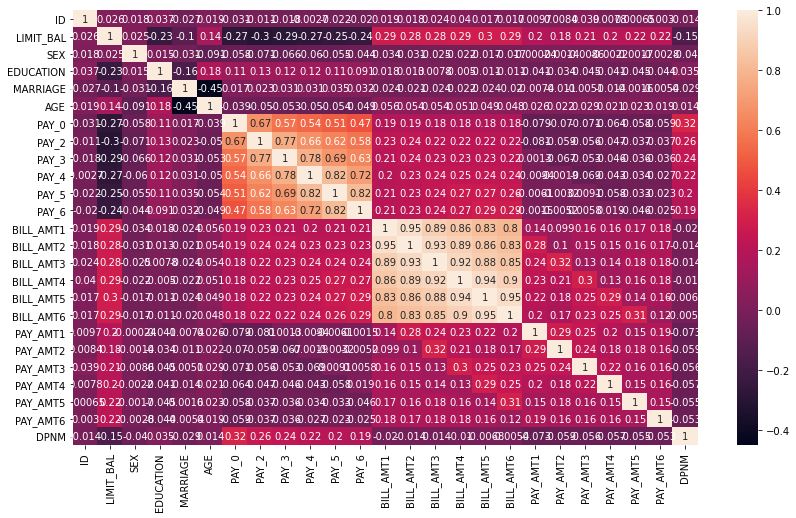

In [6]:
# heat map - correlation map
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [7]:
df["DPNM"].value_counts()

0    23364
1     6636
Name: DPNM, dtype: int64

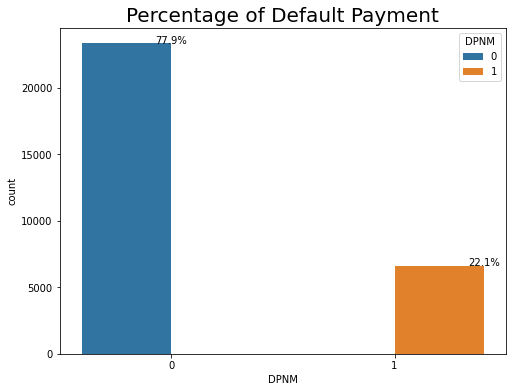

In [8]:
# percentage of default payment
plt.figure(figsize = (8,6))
ax = sns.countplot(x=df['DPNM'], hue= df['DPNM'], data=df)
plt.title('Percentage of Default Payment', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/ len(df['DPNM']))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

##### Based on the bar plot, the percentage of default payment is slightly unbalanced.

In [9]:
# Limit balance and Default Payment
LimBal_0 = df.loc[df['DPNM'] == 0]["LIMIT_BAL"]
LimBal_1 = df.loc[df['DPNM'] == 1]["LIMIT_BAL"]

/Users/shengyuangao/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shengyuangao/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


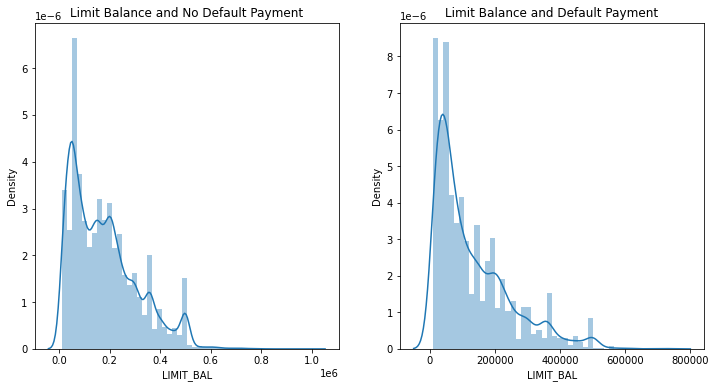

In [10]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(LimBal_0)
plt.title('Limit Balance and No Default Payment')

plt.subplot(1,2,2)
sns.distplot(LimBal_1)
plt.title('Limit Balance and Default Payment')

plt.show()

<Figure size 720x432 with 0 Axes>

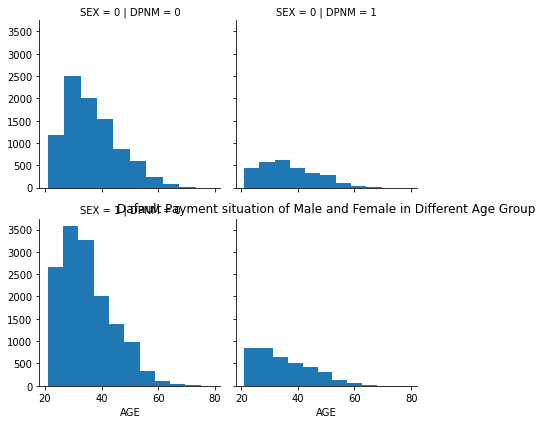

In [11]:
plt.figure(figsize = (10,6))
chart1 = sns.FacetGrid(df, col="DPNM",  row="SEX")
chart1.map(plt.hist, "AGE")
plt.title('Dafault Payment situation of Male and Female in Different Age Group')
plt.show()

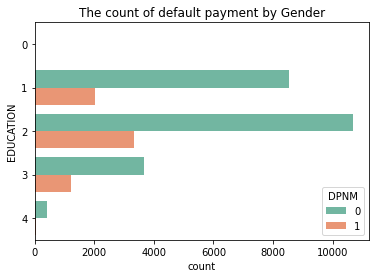

In [12]:
chart2 =sns.countplot(y="EDUCATION", data=df,hue="DPNM", palette="Set2")
plt.title('The count of default payment by Gender')
plt.show()

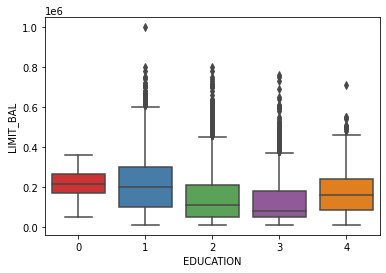

In [13]:
# relationship between eduction and limit balance
chart3 = sns.boxplot(x="EDUCATION", y = 'LIMIT_BAL', data =df, palette="Set1")

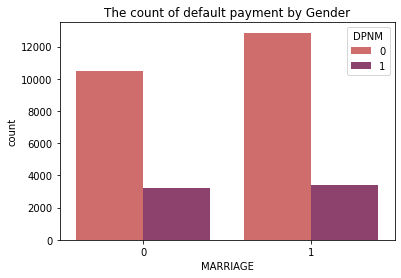

In [14]:
# distribution of default payment by sex
chart4 =sns.countplot(x="MARRIAGE", data=df,hue="DPNM", palette="flare")
plt.title('The count of default payment by Gender')
plt.show()

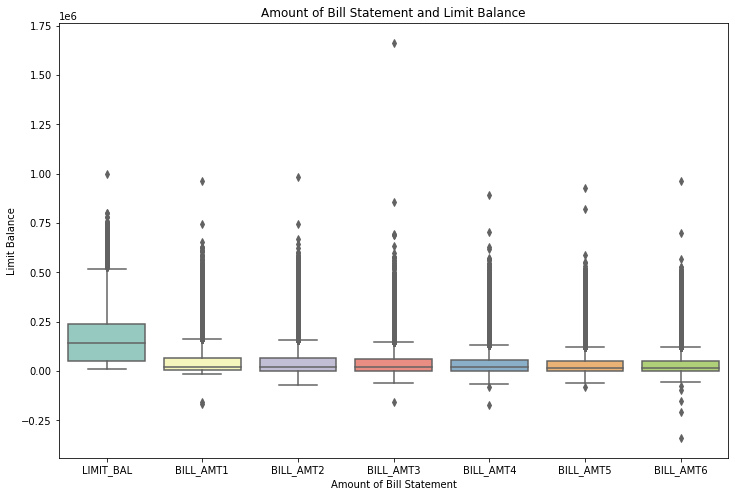

In [15]:
# amount of bill vs line of credit
plt.figure(figsize = (12,8))
chart5 = df[['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
sns.boxplot(data =chart5, palette="Set3")
plt.title('Amount of Bill Statement and Limit Balance')
plt.xlabel('Amount of Bill Statement')
plt.ylabel('Limit Balance')
plt.show()

### Machine Learning Model

In [16]:
# Copy a dataframe 
df_copy = df.copy()

In [17]:
# split into dependent value and independent values
y = df_copy['DPNM']
X = df_copy.drop(['ID','DPNM'], axis = 1)

In [18]:
# partition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

##### To avoid multicollinearity problems, we will use tree-based models and boosting algorithm.  based on research, we will use AUC as metrics to evaluate.

In [19]:
# DECISION TREE
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)
dt_predict2 = dt.predict_proba(X_test)[:,1]

In [20]:
# auc of decision tree
roc_auc_score(y_test,dt_predict2)

0.615558307469171

In [21]:
# random forest
dfc = RandomForestClassifier()
dfc.fit(X_train, y_train)
dfc_predict = dfc.predict(X_test)
dfc_predict2 = dfc.predict_proba(X_test)[:,1]

In [22]:
roc_auc_score(y_test,dfc_predict2) # AUC of random forest

0.7573511274444498

In [23]:
# Gradient Boosting
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_predict2 = gbc.predict_proba(X_test)[:,1]

In [24]:
roc_auc_score(y_test,gbc_predict2)

0.7797314201614988

In [25]:
# adaboost
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
abc_predict2 = abc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,abc_predict2)

0.7755880959514811

In [26]:
# xgboost
gbm = xgb.XGBClassifier()
gbm.fit(X_train, y_train)
gbm_predict = gbm.predict_proba(X_test)[:,1]
roc_auc_score(y_test,gbm_predict)

0.7804732019300977

##### tuning model parameters - choose three models from above that perform well.

In [27]:
# random forest model
max_depth =[5,6,7,8,9,10]
max_leaf_nodes = [5,10,20,None]
min_samples_split = [6, 8,10]
criterion = ['gini', 'entropy']
max_features =['auto', 'sqrt', 'log2']

grid_param_rf = {
                'criterion':criterion,
                'max_features':max_features,
               'max_depth': max_depth,
                'max_leaf_nodes': max_leaf_nodes,
                'min_samples_split': min_samples_split}

In [28]:
# tunning parameters for random forest model
dfc = RandomForestClassifier()
grid_param_dfc = GridSearchCV(estimator = dfc, param_grid = grid_param_rf, cv = 5, scoring = 'roc_auc')
grid_param_dfc.fit(X_train, y_train)
grid_param_dfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_split': 10}

In [30]:
# running random forest with appropriate parameters.
after_tuning_dfc = RandomForestClassifier(max_depth = 10,max_leaf_nodes = None, min_samples_split = 10,
                      criterion = 'entropy', max_features = 'sqrt')
after_tuning_dfc.fit(X_train,y_train)
after_tuning_dfc_predict = after_tuning_dfc.predict_proba(X_test)[:,1]

In [31]:
roc_auc_score(y_test,after_tuning_dfc_predict) 

0.7775435930221861

In [32]:
# Gradient Boosting model
grid_param_gb = {
        'loss' : ['deviance', 'exponential'],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

In [33]:
# tunning parameters for gradient boosting model
gbc = GradientBoostingClassifier()
grid_param_gbc = GridSearchCV(gbc, param_grid = grid_param_gb, scoring="roc_auc")
grid_param_gbc.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [4, 8], 'max_features': [0.3, 0.1],
                         'min_samples_leaf': [100, 150]},
             scoring='roc_auc')

In [34]:
grid_param_gbc.best_params_

{'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 0.3,
 'min_samples_leaf': 150}

In [35]:
# running gradient boosting with appropriate parameters.
after_tuning_gbc = GradientBoostingClassifier(n_estimators = 300, min_samples_leaf = 150, max_features = 0.3, max_depth =8,learning_rate =0.01, loss ='deviance')
after_tuning_gbc.fit(X_train, y_train)
after_tuning_gbc_predict2 = after_tuning_gbc.predict_proba(X_test)[:,1]

In [36]:
roc_auc_score(y_test,after_tuning_gbc_predict2)

0.7808242087094264

In [37]:
# xgboost model
learning_rate= [0.01,0.05, 0.1]
max_depth=[3, 5, 7, 10]
grid_param_xg = {
                'learning_rate':learning_rate,
                'max_depth':max_depth,
                }

In [38]:
# tunning parameters for xgboost model
gbm = GradientBoostingClassifier()
grid_param_gbm = GridSearchCV(gbm, param_grid = grid_param_xg, scoring="roc_auc")
grid_param_gbm.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 10]},
             scoring='roc_auc')

In [39]:
grid_param_gbm.best_params_

{'learning_rate': 0.05, 'max_depth': 5}

In [40]:
# running xgboost with appropriate parameters.
after_tuning_gbm = xgb.XGBClassifier(learning_rate = 0.05,max_depth= 5)
after_tuning_gbm.fit(X_train, y_train)
tuning_gbm_predict = after_tuning_gbm.predict_proba(X_test)[:,1]
roc_auc_score(y_test,tuning_gbm_predict)

0.781521617527985

### SMOTE Technology Inbalanced Dataset

In [41]:
# using SMOTE technology to resample
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

In [42]:
# partition
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

In [43]:
# SMOTE - gradient boosting
smote_gbc = GradientBoostingClassifier(n_estimators = 300, min_samples_leaf = 150, max_features = 0.3, max_depth =8,learning_rate =0.01, loss ='deviance')
smote_gbc.fit(X_smote_train, y_smote_train)
smote_gbc_preds = smote_gbc.predict_proba(X_smote_test)[:,1]
roc_auc_score(y_smote_test,smote_gbc_preds)

0.8648613613991959

In [44]:
smote_gbc.feature_importances_

array([0.03855889, 0.06713478, 0.0415627 , 0.07434376, 0.01592885,
       0.17334148, 0.12376551, 0.08060658, 0.0424614 , 0.03393599,
       0.03182733, 0.04174224, 0.01901404, 0.01438599, 0.01233547,
       0.01198034, 0.00870431, 0.04940028, 0.03402008, 0.02797723,
       0.02340488, 0.01414672, 0.01942114])

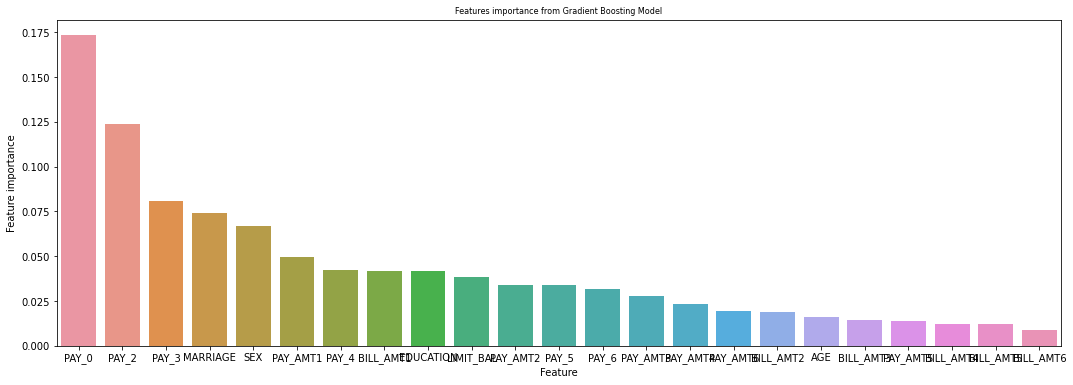

In [49]:
# barchart shows the feature importance based on gradient boosting model.
Feature_importance = pd.DataFrame({'Feature': X.columns, 'Feature importance': smote_gbc.feature_importances_})
Feature_importance = Feature_importance.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (18,6))
plt.title('Features importance from Gradient Boosting Model',fontsize=8)
feature_bar = sns.barplot(x='Feature',y='Feature importance',data=Feature_importance)
plt.show() 

In [46]:
# SMOTE Xgboost 
smote_gbm = xgb.XGBClassifier(n_estimators = 300,learning_rate = 0.05,max_depth= 5)
smote_gbm.fit(X_smote_train, y_smote_train)
smote_gbm_preds = smote_gbm.predict_proba(X_smote_test)[:,1]
roc_auc_score(y_smote_test,smote_gbm_preds)

0.8858219750230363

In [47]:
smote_gbm.feature_importances_

array([0.02111125, 0.11939009, 0.03750199, 0.10154827, 0.01277019,
       0.11919422, 0.1826993 , 0.06202209, 0.04617533, 0.06410324,
       0.04384868, 0.02324442, 0.01239911, 0.01306327, 0.00867466,
       0.01039486, 0.00984938, 0.0220175 , 0.02189885, 0.01983922,
       0.01667353, 0.01419351, 0.01738713], dtype=float32)

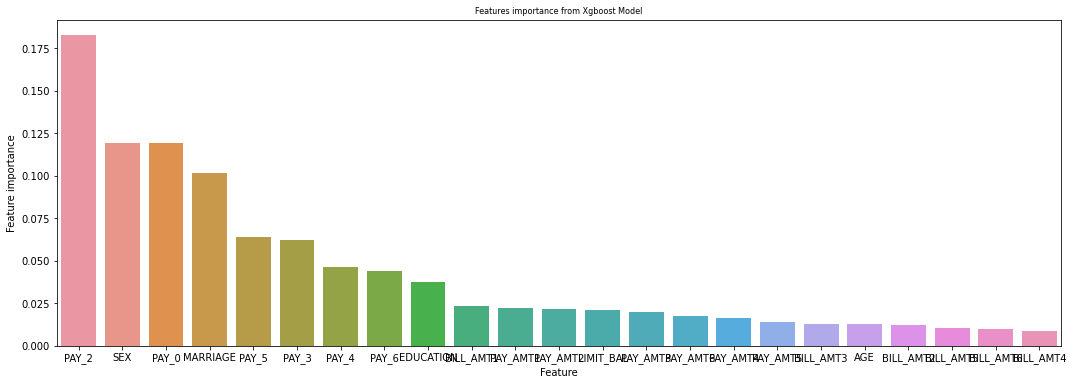

In [50]:
# barchart shows the feature importance based on xgboost model.
Feature_importance = pd.DataFrame({'Feature': X.columns, 'Feature importance': smote_gbm.feature_importances_})
Feature_importance = Feature_importance.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (18,6))
plt.title('Features importance from Xgboost Model',fontsize=8)
feature_bar = sns.barplot(x='Feature',y='Feature importance',data=Feature_importance)
plt.show() 